# Practicing - K-Means Clustering with Python Project

* Author: Cleiber Garcia

* Pourpose: Develop competencies on how to use Support Vector Machines with Python
* This Notebook was produced as part of my studies of the course 'Python for Data Science and Machine Learning Bootcamp', taught by Mr Jose Portilla, Head of Data Science at Pierian Training. The course is offered ad Udemy (https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/learn/lecture/5784218?start=15#overview). 

* Although the degree of similarity between this notebook and the notebook written by Jose Portillo for this course is almos 100%, I assure you that I wrote it line by line. Also, I took the liberty to make some changes in order to clariry some examples or to make code more readable, when I judged it apropriate.

* For more information, please contact me at cleiber.garcia@gmail.com

# 1. K-Means Clustering Project Background

For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

___
It is **very important to note, we actually have the labels for this data set, but we will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.** 

When using the Kmeans algorithm under normal circumstances, it is because you don't have labels. In this case we will use the labels to try to get an idea of how well the algorithm performed, but you won't usually do this for Kmeans, so the classification report and confusion matrix at the end of this project, don't truly make sense in a real world setting!.

# 2. The Data
We will use a data frame with 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

# 3. Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 4. Load the Working Dataset

In [2]:
df = pd.read_csv('College_Data', index_col=0)

In [3]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

# 5. Exploratory Data Analysis

In [5]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


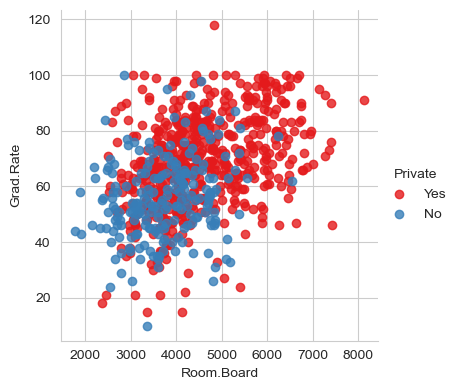

In [6]:
# Room.Board versus Grad.Rate Scatter Plot
sns.set_style('whitegrid')
sns.lmplot(data=df, x='Room.Board', y='Grad.Rate', hue='Private',
          palette='Set1', height=4, aspect=1, fit_reg=False)

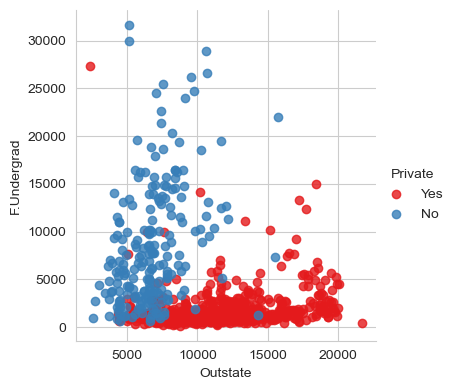

In [7]:
# Outstate versus F.Undergrad Scatter Plot
sns.set_style('whitegrid')
sns.lmplot(data=df, x='Outstate', y='F.Undergrad', hue='Private',
          palette='Set1', height=4, aspect=1, fit_reg=False)

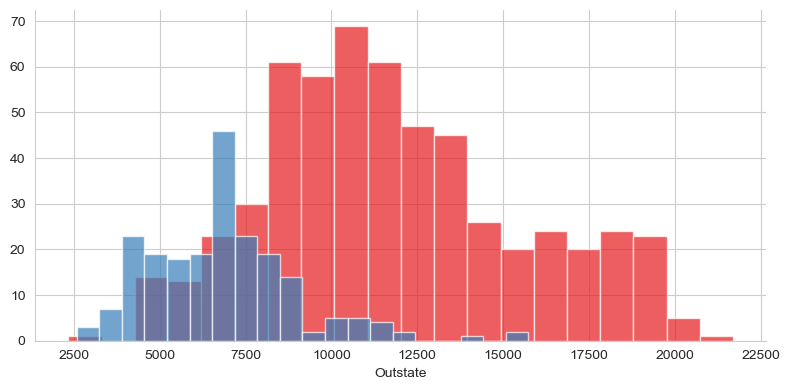

In [8]:
# Stacked histogram showing Out of State Tuition based on the Private column
sns.set_style('whitegrid')
g = sns.FacetGrid(df, hue='Private', palette='Set1', height=4, aspect=2)
g = g.map(plt.hist, 'Outstate', bins=20, alpha=0.7)

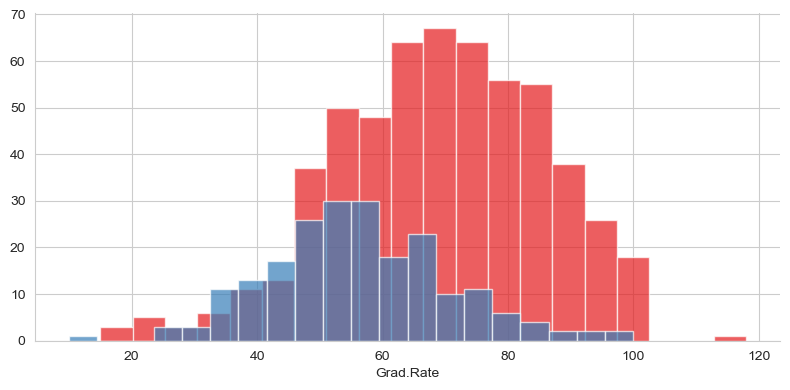

In [9]:
# Stacked histogram showing Graduation Rate based on the Private column
sns.set_style('whitegrid')
g = sns.FacetGrid(df, hue='Private', palette='Set1', height=4, aspect=2)
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)

In [10]:
# Show the school with Grad.Rate above 100%
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [11]:
# Set the maximum Grad.Rate to 100%
df['Grad.Rate']['Cazenovia College'] = 100

C:\Users\Cleiber\AppData\Local\Temp\ipykernel_15004\1960571231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grad.Rate']['Cazenovia College'] = 100


In [12]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


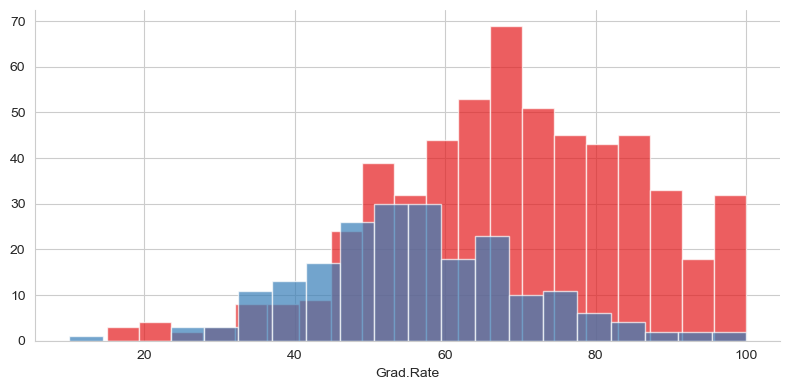

In [13]:
# Stacked histogram showing Graduation Rate based on the Private column
sns.set_style('whitegrid')
g = sns.FacetGrid(df, hue='Private', palette='Set1', height=4, aspect=2)
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)

# 6. K-Means Cluster Creation

In [20]:
# Import Python module
from sklearn.cluster import KMeans

In [21]:
# Instantiate an object-model
kmeans = KMeans(n_clusters=2, n_init='auto')

In [22]:
# Train the model
kmeans.fit(df.drop('Private', axis=1))

KMeans(n_clusters=2, n_init='auto')

In [23]:
# Print the center vectors
kmeans.cluster_centers_

array([[1.94782101e+03, 1.31368639e+03, 4.86974852e+02, 2.67500000e+01,
        5.45857988e+01, 2.11855178e+03, 5.43665680e+02, 1.07181509e+04,
        4.37916420e+03, 5.44346154e+02, 1.26384320e+03, 7.10266272e+01,
        7.82988166e+01, 1.37792899e+01, 2.37071006e+01, 9.61601627e+03,
        6.59896450e+01],
       [1.00549109e+04, 6.73820792e+03, 2.74102970e+03, 3.29702970e+01,
        6.39009901e+01, 1.42840297e+04, 2.94107921e+03, 8.58346535e+03,
        4.21270297e+03, 5.83079208e+02, 1.85466337e+03, 8.35940594e+01,
        8.90990099e+01, 1.61673267e+01, 1.62970297e+01, 9.95570297e+03,
        6.17623762e+01]])

# 7. Evaluation

## 7.1 Set a Cluster Column

To evaluate a cluster, we need labels. We will take advantage that we have labels for this working dataset to evaluate it (but usually we don't have the labels for real world problems of clustering).

We will create a new column with called 'Cluster' with 1 for a Private school and 0 for a Public school.

In [25]:
df.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [31]:
df_bkp = df.copy()

In [32]:
df['Private']

Abilene Christian University      Yes
Adelphi University                Yes
Adrian College                    Yes
Agnes Scott College               Yes
Alaska Pacific University         Yes
                                 ... 
Worcester State College            No
Xavier University                 Yes
Xavier University of Louisiana    Yes
Yale University                   Yes
York College of Pennsylvania      Yes
Name: Private, Length: 777, dtype: object

In [35]:
def set_cluster(private):
    if private == 'Yes':
        return 1
    else:
        return 0
    
df['Cluster'] = df['Private'].apply(set_cluster)

In [36]:
df['Cluster']

Abilene Christian University      1
Adelphi University                1
Adrian College                    1
Agnes Scott College               1
Alaska Pacific University         1
                                 ..
Worcester State College           0
Xavier University                 1
Xavier University of Louisiana    1
Yale University                   1
York College of Pennsylvania      1
Name: Cluster, Length: 777, dtype: int64

## 7.2 Create a Confusion Matrix

We will create a confusion matrix to see how well our model clustered the data, without knowing previously the labels

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
print(confusion_matrix(df['Cluster'], kmeans.labels_))

[[123  89]
 [553  12]]


In [41]:
print(classification_report(df['Cluster'], kmeans.labels_))

              precision    recall  f1-score   support

           0       0.18      0.58      0.28       212
           1       0.12      0.02      0.04       565

    accuracy                           0.17       777
   macro avg       0.15      0.30      0.16       777
weighted avg       0.14      0.17      0.10       777

